In [ ]:
!pip install -r /content/drive/My\ Drive/Car\ Parking\ detection/requirements.txt

In [ ]:
import numpy as np
import os
from tensorflow.keras import applications
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import files
uploaded = files.upload()  # This opens a dialog for file upload

Saving train_data.zip to train_data.zip


In [ ]:
import zipfile
import os

with zipfile.ZipFile('train_data.zip', 'r') as zip_ref:
    zip_ref.extractall('train_data')


In [ ]:
import numpy as np
import os

files_train = 0
files_validation = 0

# Adjust folder paths for Colab environment
folder_train = '/content/train_data/train_data/train'
folder_test = '/content/train_data/train_data/test'

# Count files in train folder
for sub_folder in os.listdir(folder_train):
    path, dirs, files = next(os.walk(os.path.join(folder_train, sub_folder)))
    files_train += len(files)

# Count files in test folder
for sub_folder in os.listdir(folder_test):
    path, dirs, files = next(os.walk(os.path.join(folder_test, sub_folder)))
    files_validation += len(files)

print("Train files:", files_train)
print("Validation files:", files_validation)


Train files: 432
Validation files: 164


In [ ]:
img_width, img_height = 48,48
train_data_dir = '/content/train_data/train_data/train'
validation_data_dir = '/content/train_data/train_data/test'
nb_train_sample = files_train
nb_validation_sample = files_validation
batch_size = 32
epochs = 15
num_classes = 2

In [ ]:
model = applications.VGG16(weights = 'imagenet', include_top = False, input_shape = (img_width, img_height, 3))

58889256/58889256 [==============================] - 4s 0us/step


In [ ]:
model.layers

In [ ]:
for layer in model.layers[:10]:
    layer.traiable = False

In [ ]:
x = model.output
x = Flatten()(x)

predictions = Dense(num_classes, activation = 'softmax')(x)
model_final = Model(inputs = model.input, outputs = predictions)


In [ ]:
train_datagen = ImageDataGenerator(rescale=1.0/255, horizontal_flip=True,
                   fill_mode='nearest',zoom_range=0.1, width_shift_range=0.1,
                  height_shift_range=0.1, rotation_range=5)

test_datagen = ImageDataGenerator(rescale=1.0/255, horizontal_flip=True,
                   fill_mode='nearest',zoom_range=0.1, width_shift_range=0.1,
                  height_shift_range=0.1, rotation_range=5)

train_generator = train_datagen.flow_from_directory(train_data_dir, target_size=(img_height, img_width),
                                 batch_size = batch_size, class_mode = 'categorical')

validation_generator = test_datagen.flow_from_directory(validation_data_dir, target_size=(img_height, img_width),
                                 batch_size = batch_size, class_mode = 'categorical')

Found 432 images belonging to 2 classes.
Found 164 images belonging to 2 classes.


In [ ]:
model_final.compile(loss = 'categorical_crossentropy',
                    optimizer = optimizers.SGD(learning_rate = 0.0001, momentum=0.9),
                    metrics=['accuracy'])

In [ ]:
history = model_final.fit(
train_generator, steps_per_epoch=nb_train_sample//batch_size,
    validation_steps=nb_validation_sample//batch_size,
epochs = epochs, validation_data=validation_generator)

Epoch 1/15
13/13 [==============================] - 40s 3s/step - loss: 0.6003 - accuracy: 0.6130 - val_loss: 0.4242 - val_accuracy: 0.7750
Epoch 2/15
13/13 [==============================] - 40s 3s/step - loss: 0.3147 - accuracy: 0.8350 - val_loss: 0.2981 - val_accuracy: 0.8813
Epoch 3/15
13/13 [==============================] - 36s 3s/step - loss: 0.2155 - accuracy: 0.9525 - val_loss: 0.2451 - val_accuracy: 0.8875
Epoch 4/15
13/13 [==============================] - 40s 3s/step - loss: 0.1544 - accuracy: 0.9591 - val_loss: 0.2076 - val_accuracy: 0.9062
Epoch 5/15
13/13 [==============================] - 38s 3s/step - loss: 0.1220 - accuracy: 0.9700 - val_loss: 0.2302 - val_accuracy: 0.9000
Epoch 6/15
13/13 [==============================] - 38s 3s/step - loss: 0.0948 - accuracy: 0.9775 - val_loss: 0.1742 - val_accuracy: 0.9250
Epoch 7/15
13/13 [==============================] - 40s 3s/step - loss: 0.0915 - accuracy: 0.9775 - val_loss: 0.1894 - val_accuracy: 0.9125
Epoch 8/15
13/13 [==

In [ ]:
history.history


{'loss': [0.600335955619812,
  0.3147400915622711,
  0.21546173095703125,
  0.15437199175357819,
  0.12203414738178253,
  0.09478135406970978,
  0.09153031557798386,
  0.07032325118780136,
  0.07895804941654205,
  0.06918670982122421,
  0.05809282138943672,
  0.04161974415183067,
  0.054068952798843384,
  0.059271201491355896,
  0.03974286466836929],
 'accuracy': [0.6129807829856873,
  0.8349999785423279,
  0.9524999856948853,
  0.9591346383094788,
  0.9700000286102295,
  0.9775000214576721,
  0.9775000214576721,
  0.9825000166893005,
  0.9750000238418579,
  0.9850000143051147,
  0.9825000166893005,
  0.9900000095367432,
  0.9800000190734863,
  0.9825000166893005,
  0.987500011920929],
 'val_loss': [0.42416754364967346,
  0.29813385009765625,
  0.2451210767030716,
  0.2075774222612381,
  0.2301771193742752,
  0.17423631250858307,
  0.18936283886432648,
  0.13894876837730408,
  0.16152547299861908,
  0.15009412169456482,
  0.13635596632957458,
  0.1520284116268158,
  0.1611255407333374,

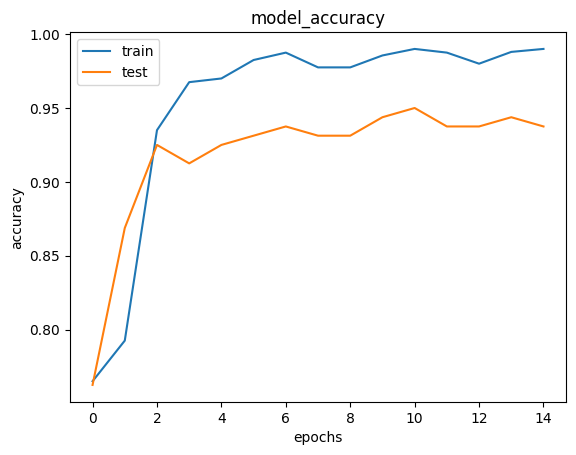

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

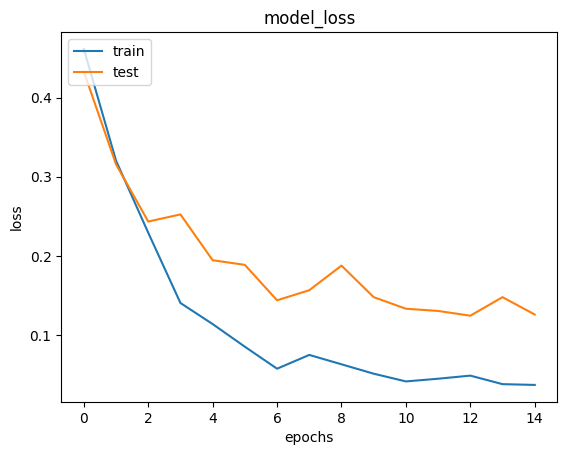

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

In [ ]:
model_final.save('/content/drive/My Drive/Car Parking detection/Carmodel_final',save_format = 'tf')


In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model = load_model('/content/drive/My Drive/Car Parking detection/Carmodel_final.h5')

In [ ]:
class_dictionary = {}
class_dictionary[0] = 'no_car'
class_dictionary[1] = 'car'

In [ ]:
class_dictionary

{0: 'no_car', 1: 'car'}

In [ ]:
import cv2
def make_prediction(image):
    image = cv2.imread(image)
    image = cv2.resize(image, (48, 48))
    img = image/255
#     (1, 48, 48, 3) -> 4D Tensor
    img = np.expand_dims(img, axis = 0)

    class_predicted = model.predict(img)
    intId = np.argmax(class_predicted[0])
    label = class_dictionary[intId]
    return label

In [ ]:
make_prediction("/content/drive/My Drive/Car Parking detection/spot1.jpg")

1/1 [==============================] - 0s 163ms/step


'car'

In [ ]:
make_prediction("/content/drive/My Drive/Car Parking detection/spot4.jpg")

1/1 [==============================] - 0s 40ms/step


'car'

In [ ]:
make_prediction("/content/drive/My Drive/Car Parking detection/car_spot2.jpg")

1/1 [==============================] - 0s 39ms/step


'car'

In [ ]:
make_prediction("/content/drive/My Drive/Car Parking detection/nocar_spot13.jpg")

1/1 [==============================] - 0s 35ms/step


'no_car'